# STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS


importing machine learning libraries

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

In [2]:
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('Tesla.csv')

In [5]:
data=data.dropna()

In [6]:
data

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,company_name
0,2471297,550793298357391360,TSLA,ScoutingGW,1420154330,"#bluechips like $TSLA, $AAPL, $DIS, $TWTR & NV...",0,0,3,Tesla Inc
1,2471298,550780769497808896,TSLA,SharePlanner,1420151343,2014 Was A Great Year of Trading In The Splash...,1,0,1,Tesla Inc
2,2471299,550703624544718848,TSLA,laurenholmesNYC,1420132950,Best Trade: $AAPL; $GOOG $TSLA $YHOO $LNKD I r...,0,1,2,Tesla Inc
3,2471300,550676585393569792,TSLA,laurenholmesNYC,1420126503,$AAPL $ARWR $TSLA $BABA Wish everyone happy ne...,0,1,1,Tesla Inc
4,2471301,550673738161610752,TSLA,laurenholmesNYC,1420125824,$AAPL $TSLA $GILD $CELG $BABA $SCTY $RIG $WFM ...,0,1,1,Tesla Inc
...,...,...,...,...,...,...,...,...,...,...
1096863,3568160,1212158772015034369,TSLA,StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,Tesla Inc
1096864,3568161,1212159099632267268,TSLA,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0,Tesla Inc
1096865,3568162,1212159184931717120,TSLA,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0,Tesla Inc
1096866,3568163,1212159838882533376,TSLA,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,Tesla Inc


In [7]:
data['Date'] = pd.to_datetime(data['post_date'],unit='s')


C:\Users\Aditi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
data['Date']=data['Date'].dt.date

C:\Users\Aditi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
cdata=data[['Date','body']]

In [10]:
cdata.rename(columns = {'body':"Tweets"},inplace=True)

C:\Users\Aditi\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
cdata

,Date,Tweets
0,2015-01-01,"#bluechips like $TSLA, $AAPL, $DIS, $TWTR & NV..."
1,2015-01-01,2014 Was A Great Year of Trading In The Splash...
2,2015-01-01,Best Trade: $AAPL; $GOOG $TSLA $YHOO $LNKD I r...
3,2015-01-01,$AAPL $ARWR $TSLA $BABA Wish everyone happy ne...
4,2015-01-01,$AAPL $TSLA $GILD $CELG $BABA $SCTY $RIG $WFM ...
...,...,...
1096863,2019-12-31,"I'm getting wasted on NYE, and thanks to @NHTS..."
1096864,2019-12-31,$TSLA Very Interesting dude:
1096865,2019-12-31,If only 2020 brought more self-awareness to Te...
1096866,2019-12-31,In 2020 I may start Tweeting out positive news...


### Removing special character from each tweets

In [12]:
cdata['Tweets'] = cdata['Tweets'].map(lambda x: re.sub(r'\W+', ' ', x))

C:\Users\Aditi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [2]:
for i in range(len(data)) :
    string=data.loc[i,'Tweets']
    ''.join(e for e in string if e.isalnum())
    data.at[i,'Tweets']=string

NameError: name 'data' is not defined

In [13]:
cdata

,Date,Tweets
0,2015-01-01,bluechips like TSLA AAPL DIS TWTR NVO are gre...
1,2015-01-01,2014 Was A Great Year of Trading In The Splash...
2,2015-01-01,Best Trade AAPL GOOG TSLA YHOO LNKD I review t...
3,2015-01-01,AAPL ARWR TSLA BABA Wish everyone happy new y...
4,2015-01-01,AAPL TSLA GILD CELG BABA SCTY RIG WFM BA HAPP...
...,...,...
1096863,2019-12-31,I m getting wasted on NYE and thanks to NHTSAg...
1096864,2019-12-31,TSLA Very Interesting dude
1096865,2019-12-31,If only 2020 brought more self awareness to Te...
1096866,2019-12-31,In 2020 I may start Tweeting out positive news...


### Displaying the data with date and tweets, we can notice there are multiple tweets for each day. So we will club them together 

#### Creating a dataframe where we will combine the tweets date wise and store into

In [14]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [15]:
cdata['Date'] = pd.to_datetime(cdata['Date'])

C:\Users\Aditi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.at[indx,'Date']=get_date
        ccdata.at[indx,'Tweets']=get_tweet
        indx=indx+1
        get_tweet=" "

#### All the tweets has been clubbed as per their date

In [ ]:
ccdata

### Now to know the "closing price" of each day we will import STOCK PRICE DATA for TESLA from "yahoo.finance". We will consider "Close" price only

In [ ]:
read_stock_p=pd.read_csv('TSLA.csv')
read_stock_p

#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe

In [ ]:
ccdata['Prices']=""

In [ ]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.at[i,'Prices']=int(read_stock_p.Close[j])
            break

#### Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [ ]:
ccdata

#### So we take the mean for the close price and put it in the blank value

In [ ]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

#### Now all the entries have some value

In [ ]:
ccdata

#### Making "prices" column as integer so mathematical operations could be performed easily

In [ ]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

#### Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [ ]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

#### Downloading the package essential to perform sentiment analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')

#### This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement 

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.at[indexx, 'Comp']= sentence_sentiment['compound']
        ccdata.at[indexx, 'Negative']= sentence_sentiment['neg']
        ccdata.at[indexx, 'Neutral']= sentence_sentiment['neu']
        ccdata.at[indexx, 'Positive']= sentence_sentiment['pos']
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

In [ ]:
ccdata

#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same

% of positive tweets=  74.94300518134716
% of negative tweets=  7.2020725388601035


[]

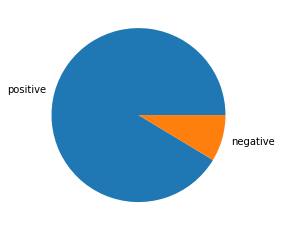

In [87]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning

In [3]:
dataframe=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()


NameError: name 'ccdata' is not defined

In [190]:
dataframe

,Date,Prices,Comp,Negative,Neutral,Positive
0,2015-01-01,53,0.9906,0.028,0.818,0.154
1,2015-01-02,43,0.9443,0.071,0.81,0.119
2,2015-01-03,53,0.7717,0,0.915,0.085
3,2015-01-04,53,0.8781,0.038,0.812,0.149
4,2015-01-05,42,0.9437,0.022,0.936,0.042
...,...,...,...,...,...,...
9645,2019-12-26,86,1,0.077,0.792,0.132
9646,2019-12-27,86,1,0.075,0.802,0.122
9647,2019-12-28,53,1,0.083,0.77,0.147
9648,2019-12-29,53,0.9999,0.098,0.775,0.128


In [277]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])

In [2]:
dataframe

NameError: name 'dataframe' is not defined

In [1]:
dataframe['Date']=Dataframe['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

NameError: name 'Dataframe' is not defined

In [282]:
train_data_start = '2015-01-01'
train_data_end = '2018-12-31'
test_data_start = '2019-01-01'
test_data_end = '2019-12-30'
mask = (dataframe['Date'] >= train_data_start ) & (dataframe['Date'] <= train_data_end)
train = dataframe.loc[mask]
mask = (dataframe['Date'] >= test_data_start ) & (dataframe['Date'] <= test_data_end)
test = dataframe.loc[mask]

In [283]:
train

,Date,Prices,Comp,Negative,Neutral,Positive
0,2015-01-01,53,0.9906,0.028,0.818,0.154
1,2015-01-02,43,0.9443,0.071,0.81,0.119
2,2015-01-03,53,0.7717,0,0.915,0.085
3,2015-01-04,53,0.8781,0.038,0.812,0.149
4,2015-01-05,42,0.9437,0.022,0.936,0.042
...,...,...,...,...,...,...
9281,2018-12-27,63,1,0.091,0.789,0.12
9282,2018-12-28,66,1,0.074,0.793,0.133
9283,2018-12-29,53,1,0.092,0.778,0.13
9284,2018-12-30,53,0.9999,0.088,0.791,0.121


In [284]:
test

,Date,Prices,Comp,Negative,Neutral,Positive
1452,2019-01-01,53,0.9916,0.007,0.862,0.13
1453,2019-01-02,62,0.9477,0.051,0.888,0.061
1454,2019-01-03,60,0.9992,0.062,0.849,0.088
1455,2019-01-04,63,0.9983,0.024,0.91,0.066
1456,2019-01-05,53,0.9992,0.04,0.829,0.131
...,...,...,...,...,...,...
9645,2019-12-26,86,1,0.077,0.792,0.132
9646,2019-12-27,86,1,0.075,0.802,0.122
9647,2019-12-28,53,1,0.083,0.77,0.147
9648,2019-12-29,53,0.9999,0.098,0.775,0.128


In [285]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [286]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)


In [287]:
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])

In [288]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [291]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, train['Prices'])
prediction=rf.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])
predictions_df['Prices'] = predictions_df['Prices'].apply(np.int64)
predictions_df['Prices'] = predictions_df['Prices'] 
predictions_df['actual_value'] = test['Prices']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['Prices']=test['Prices'].apply(np.int64)
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))
print(rf.score(numpy_dataframe_train, train['Prices']))

ValueError: Shape of passed values is (2051, 1), indices imply (364, 1)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Aditi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


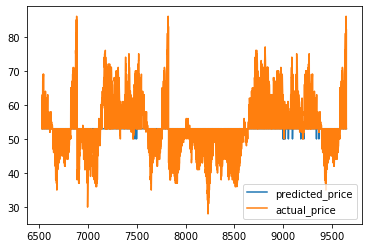

In [263]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', #'relu', the rectified linear unit function
                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
"""Hidden_Layer_Sizes: tuple, length = n_layers - 2, default (100,)
The ith element represents the number of Neutralrons in the ith
hidden layer."""
mlpc.fit(numpy_dataframe_train, train['Prices'])   
prediction = mlpc.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = np.arange(6528,9649+1)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])
predictions_df['Prices'] = predictions_df['Prices'].apply(np.int64)
predictions_df['Prices'] = predictions_df['Prices'] 
predictions_df['actual_value'] = test['Prices']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['Prices']=test['Prices'].apply(np.int64)

In [267]:
dataframe

,Date,Prices,Comp,Negative,Neutral,Positive
0,2015-01-01,53,0.9906,0.028,0.818,0.154
1,2015-01-02,43,0.9443,0.071,0.81,0.119
2,2015-01-03,53,0.7717,0,0.915,0.085
3,2015-01-04,53,0.8781,0.038,0.812,0.149
4,2015-01-05,42,0.9437,0.022,0.936,0.042
...,...,...,...,...,...,...
9645,2019-12-26,86,1,0.077,0.792,0.132
9646,2019-12-27,86,1,0.075,0.802,0.122
9647,2019-12-28,53,1,0.083,0.77,0.147
9648,2019-12-29,53,0.9999,0.098,0.775,0.128


In [272]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])


In [274]:
train_data_start = '2007-01-01'
train_data_end = '2014-12-31'
test_data_start = '2015-01-01'
test_data_end = '2016-12-31'
mask = (dataframe['Date'] >= train_data_start ) & (dataframe['Date'] <= train_data_end)
train = dataframe.loc[mask]
mask = (dataframe['Date'] >= test_data_start ) & (dataframe['Date'] <= test_data_end)
test = dataframe.loc[mask]


In [275]:
test

,Date,Prices,Comp,Negative,Neutral,Positive
0,2015-01-01,53,0.9906,0.028,0.818,0.154
1,2015-01-02,43,0.9443,0.071,0.81,0.119
2,2015-01-03,53,0.7717,0,0.915,0.085
3,2015-01-04,53,0.8781,0.038,0.812,0.149
4,2015-01-05,42,0.9437,0.022,0.936,0.042
...,...,...,...,...,...,...
8551,2016-12-27,43,0.9999,0.049,0.835,0.117
8552,2016-12-28,43,0.9636,0.074,0.846,0.08
8553,2016-12-29,42,0.9982,0.083,0.812,0.104
8554,2016-12-30,42,0.9997,0.051,0.827,0.122


In [276]:
train

,Date,Prices,Comp,Negative,Neutral,Positive


In [ ]:
dataframe = pd.DataFrame(ccdata, columns = ['Date', 'Prices','Comp','Negative','Neutral','Positive'])

In [ ]:
dataframe.set_index('Date', inplace=True)
dataframe.info()

In [ ]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [ ]:
train_data_start = '2015-01-01'
train_data_end = '2018-12-31'
test_data_start = '2019-01-01'
test_data_end = '2019-12-30'
train = dataframe.loc[train_data_start : train_data_end]
test = dataframe.loc[test_data_start:test_data_end]